In [1]:
import pandas as pd
import numpy as np

### Intro
Pandas is a powerful library for working with time series and tabular data. We will just scratch the surface here. 
There are great tutorials on their website, such as [10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html). 

The purpose of introducing it here is that many of the internal data structures we use are from pandas, and many of our functions either take pandas objects as input
or return them as output. It will be useful to have a working understanding of the operations available, especially when working with return values that are very large
pandas data frames.

In [2]:
# TODO groupby, plot, indexing, parquet and other file types

In [3]:
!touch example.csv && rm example.csv
!echo "column1,column2" >> example.csv
!echo "foo,2" >> example.csv
!echo "bar,3" >> example.csv
!echo "baz,4" >> example.csv
!echo "baz,5" >> example.csv

In [4]:
df = pd.read_csv("example.csv")

In [5]:
df

,column1,column2
0,foo,2
1,bar,3
2,baz,4
3,baz,5


In [6]:
df.columns

Index(['column1', 'column2'], dtype='object')

In [7]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [8]:
df.shape

(4, 2)

In [9]:
df["column1"]

0    foo
1    bar
2    baz
3    baz
Name: column1, dtype: object

In [11]:
df[2:3]

,column1,column2
2,baz,4


In [12]:
df.loc[3, "column2"]

5

In [15]:
df.iloc[1,:]

column1    bar
column2      3
Name: 1, dtype: object

In [9]:
import math
x = [i/10 for i in range(20)]
fx = [math.sqrt(i) for i in x]
fx

[0.0,
 0.31622776601683794,
 0.4472135954999579,
 0.5477225575051661,
 0.6324555320336759,
 0.7071067811865476,
 0.7745966692414834,
 0.8366600265340756,
 0.8944271909999159,
 0.9486832980505138,
 1.0,
 1.0488088481701516,
 1.0954451150103321,
 1.140175425099138,
 1.1832159566199232,
 1.224744871391589,
 1.2649110640673518,
 1.3038404810405297,
 1.3416407864998738,
 1.378404875209022]

In [10]:
s = pd.Series(fx, index=x)
s

0.0    0.000000
0.1    0.316228
0.2    0.447214
0.3    0.547723
0.4    0.632456
0.5    0.707107
0.6    0.774597
0.7    0.836660
0.8    0.894427
0.9    0.948683
1.0    1.000000
1.1    1.048809
1.2    1.095445
1.3    1.140175
1.4    1.183216
1.5    1.224745
1.6    1.264911
1.7    1.303840
1.8    1.341641
1.9    1.378405
dtype: float64

<AxesSubplot:>

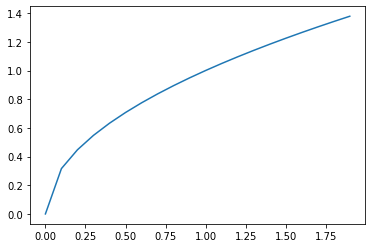

In [11]:
s.plot()

In [12]:
df2 = pd.DataFrame(
     {
         "A": 1.0,
         "B": pd.Timestamp("20130102"),
         "C": pd.Series(1, index=list(range(4)), dtype="float32"),
         "D": np.array([3] * 4, dtype="int32"),
         "E": pd.Categorical(["test", "train", "test", "train"]),
         "F": "foo",
     }
 )
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [13]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object